In [1]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the dataset
gold_dt = pd.read_csv('C:/Users/MACHIRA/Projects_With_Siddardhan/data/gld_price_data.csv')
gold_dt.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
#find any missing values
gold_dt.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [4]:
#statistical overview
gold_dt.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
#let's check the number of rows and columns
gold_dt.shape

(2290, 6)

In [6]:
#Let's get basic info about the data
gold_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### Correlation
    1. Positive Correlation
    2. Negative Correlation

In [7]:
correlation = gold_dt.corr()

<AxesSubplot:>

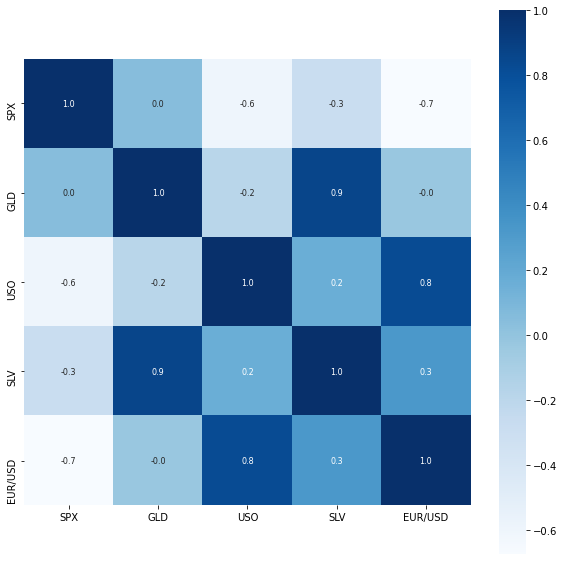

In [8]:
#let's visualize the correaltion on a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Blues")

In [9]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\MACHIRA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

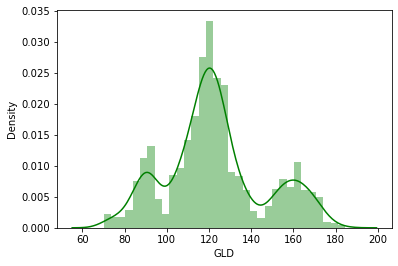

In [10]:
#let's check the distribution of the Gold Price
sns.distplot(gold_dt['GLD'], color="green")

### Splitting the Features and the Target

In [11]:
X = gold_dt.drop(['Date', 'GLD'], axis = 1)
Y = gold_dt['GLD']

### Splitting the data into Training and Testing data

In [12]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Model Training

In [13]:
regressor = RandomForestRegressor(n_estimators=100)

In [14]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation

In [15]:
#prediction on the Test data
test_dt_pred = regressor.predict(x_test)
print(test_dt_pred)

[168.53449968  82.09889989 115.83720011 127.59250093 120.73540123
 154.70099759 150.62699868 126.2019002  117.72759859 125.94890074
 116.73930116 171.86280059 141.4739995  167.78509825 115.26709982
 117.42610056 138.58800325 170.18540165 159.37180292 160.87239844
 155.10620002 125.02880029 175.94229863 157.88560335 125.34090021
  93.65659973  77.7796997  120.41660037 119.00559895 167.50139999
  88.19710032 125.42040024  91.10620092 117.69070027 121.02629926
 136.36840001 115.34960135 115.13060068 147.70230031 107.14130097
 103.99550242  87.13369793 126.47670056 117.72829999 154.92369876
 119.68909999 108.46629921 107.9410981   93.29880051 127.10379783
  75.23540024 113.73179908 121.32779973 111.36319885 119.02229913
 120.65449949 159.57830039 168.43880112 146.82699562  85.85729866
  94.47990063  86.91819883  90.64940007 118.99790049 126.4508007
 127.53380033 168.85290076 122.26589922 117.4247989   98.74900044
 168.34660142 143.11589861 131.85590217 121.38710243 120.71279934
 119.564700

In [16]:
#R Squared Error
error_score = metrics.r2_score(y_test, test_dt_pred)
print('R Squared error :', error_score)

R Squared error : 0.9891729864794682


#### Comparing the Actual Values and the Predicted values in a Plot

In [17]:
y_test = list(y_test)

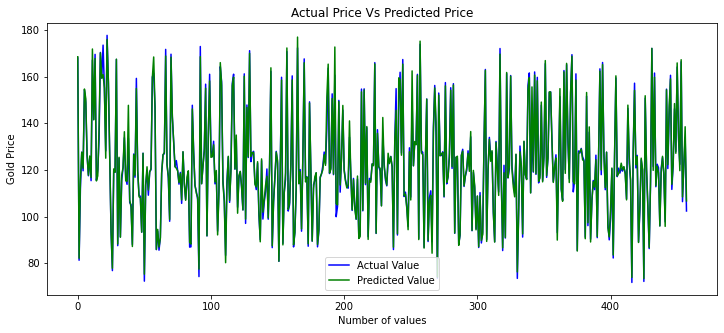

In [18]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_dt_pred, color='green', label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()